# Red Wine Quality Classification

In [29]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis (EDA)

In [4]:
target_column = 'quality'

In [5]:
# use pandas to load data into a DataFrame
df = pd.read_csv("Data/winequality-red.csv", delimiter=';')
df.shape # (rows, columns)

(1599, 12)

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
# Potability is the target variable, how many of each class are there?
target_list = df[target_column].value_counts()
target_list

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: title={'center': 'White Wine (0 - 10)'}, xlabel='quality'>

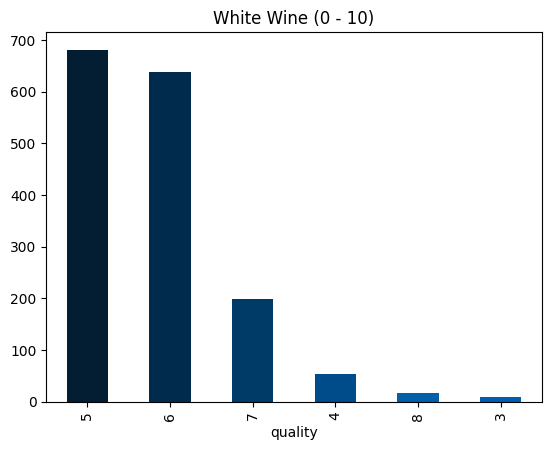

In [8]:
df[target_column].value_counts().plot(kind="bar",
                                      color=["#031d32", "#002b4c", "#003b67", "#004c8b", "#0160a8", "#005fb1"],
                                      title = "White Wine (0 - 10)")

In [9]:
# (1998/(1998+1278))*100 # jumlah persenan imbalance

In [10]:
# 1998-1278 # jumlah data imbalance

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df.describe() # bisa melihat variabel 'count' terkecil untuk mengetahui berapa banyak data yang NaN
# count terkecil terletak pada Sulfate 2945

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [13]:
df.isna().sum() # dari sini juga terlihat

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### klasifikasi akan susah dilakukan jika box plot mirip. Contoh boxplot yang bagus adalah iris dataset.
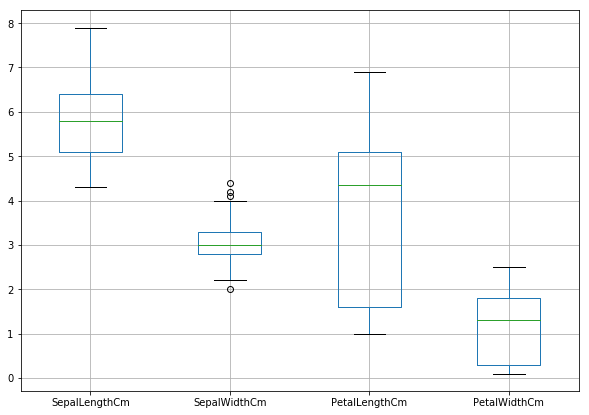

In [14]:
column_list = list(df.columns)
column_list = column_list[:-1]
column_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

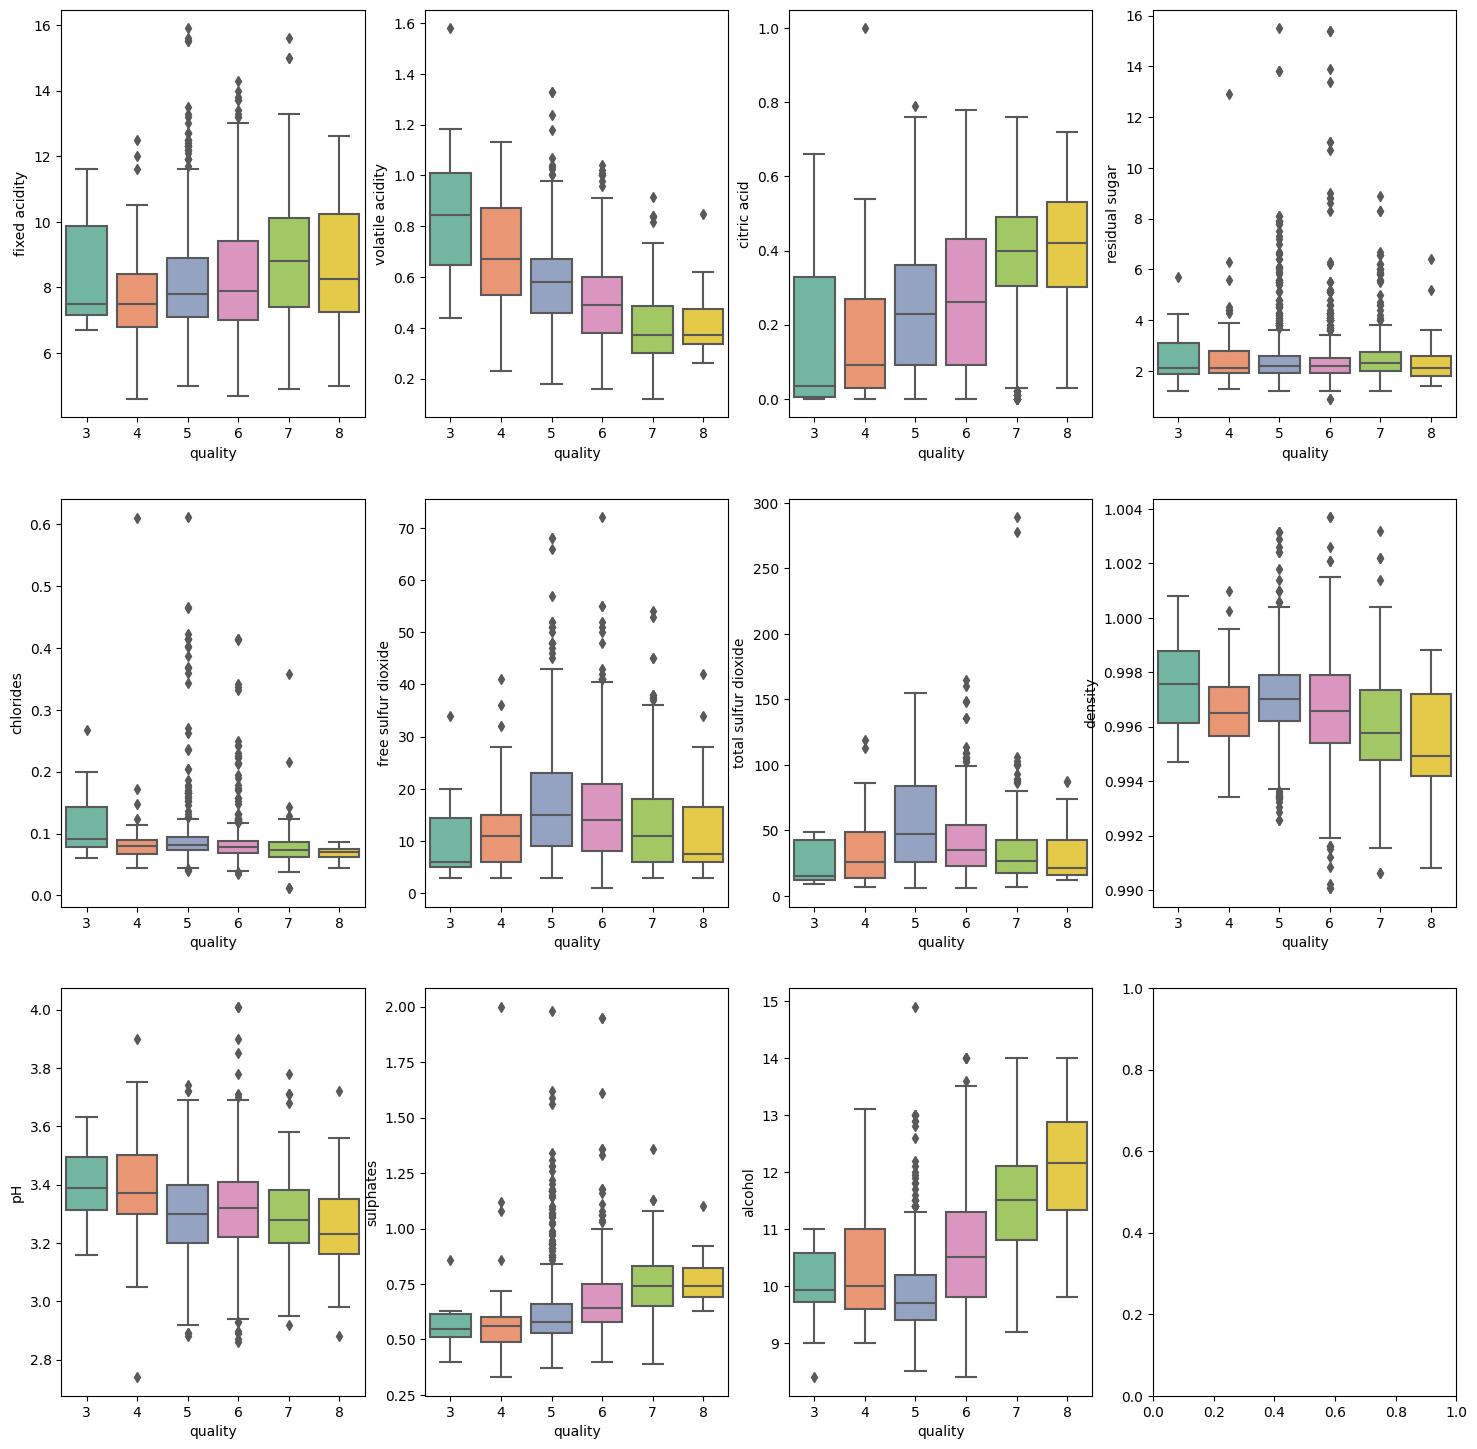

In [15]:
row, col = 3, 4
fig, axes = plt.subplots(row, col, figsize=(18, 18))
i, j = 0, 0
for z, column in enumerate(column_list):
    sns.boxplot(ax=axes[i,j], data=df, palette="Set2", x=target_column, y=column_list[z])
    if j == col-1:
        j = 0
        i += 1
    else:
        j += 1

In [16]:
target_list = target_list.index.tolist()

### Distribusi data setiap fitur dengan histograms

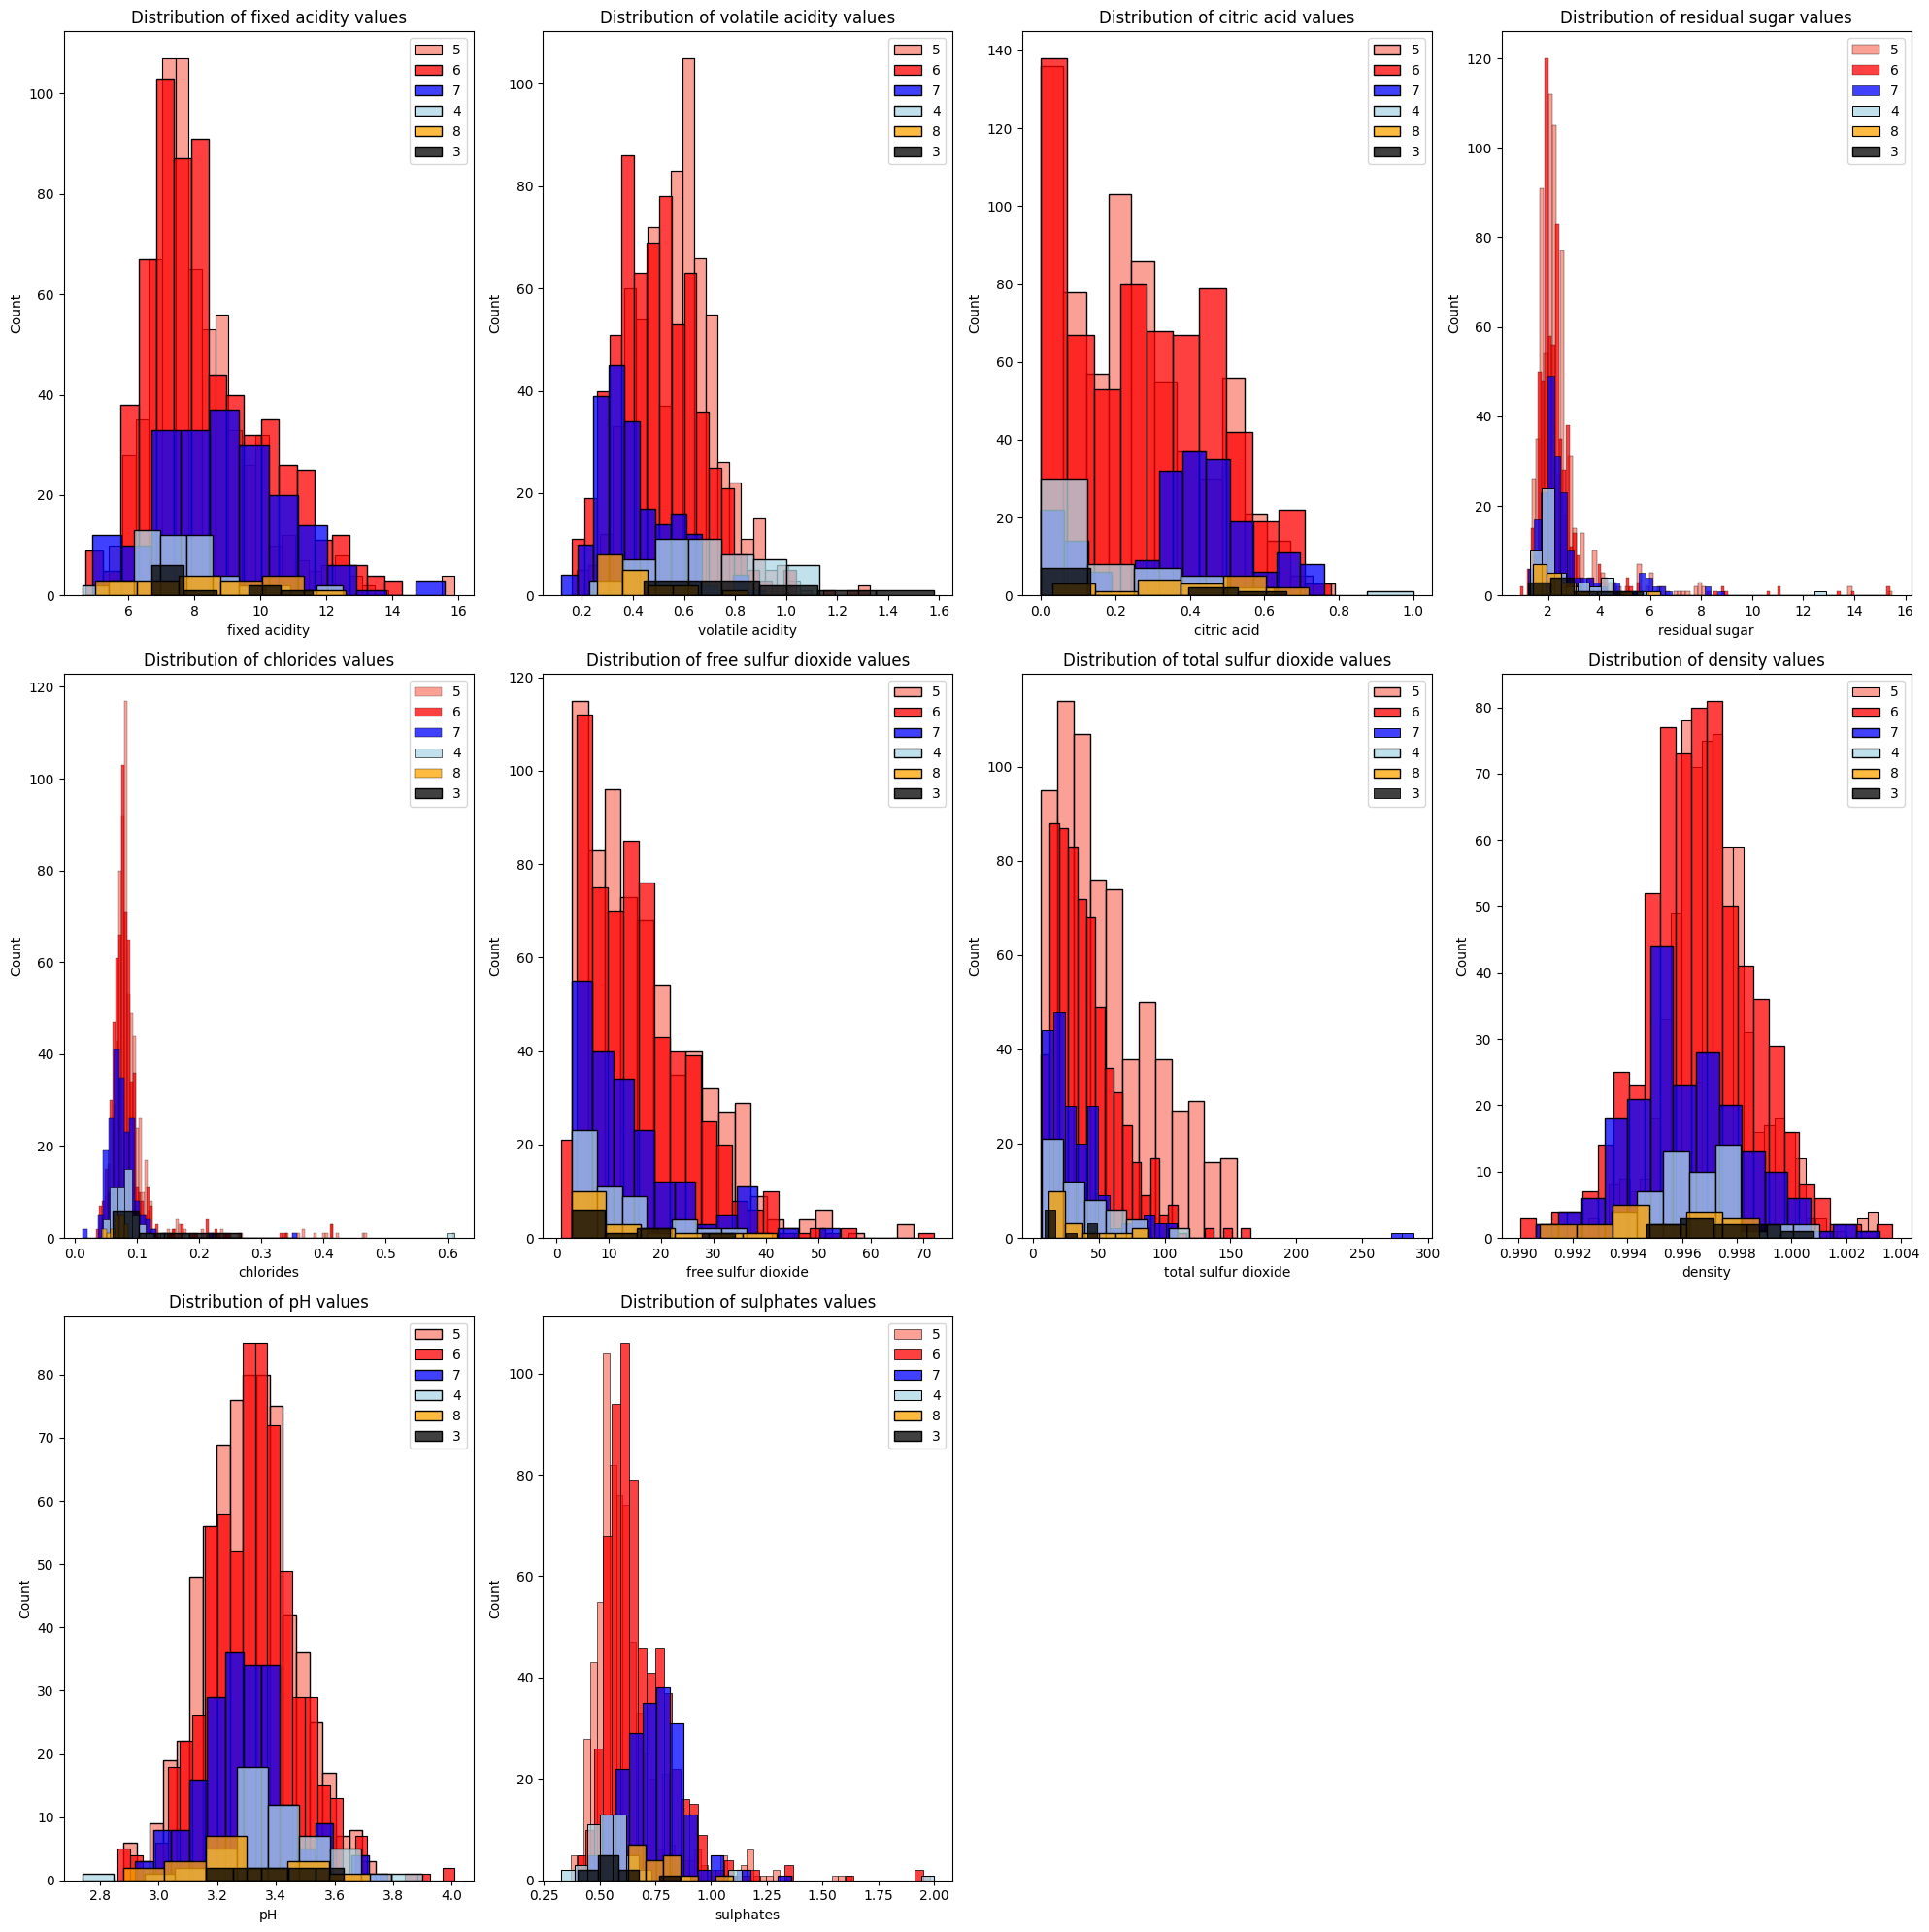

In [17]:
# Distribution of features

target_value = []

for target in target_list:
    query = str(target_column) + ' == ' + str(target)
    target_value.append(df.query(query))

colors = ['salmon', 'red', 'blue', 'lightblue', 'orange', 'black', 'gray', 'pink', 'navy', 'white']

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:10]):
    plt.subplot(3,4,ax+1)
    plt.title(f'Distribution of {column} values')
    for i, target in enumerate(target_value):
        sns.histplot(x=target[column],label=target_list[i], color=colors[i])    
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

### Correlation Matrix

- apakah variable punya ketergantungan atau tidak
- Kalo korelasinya 1: berkorelasi, negatif: tidak ada korelasinya 
- BAGUS KALO POSITIF ATAU NEGATIF, KALO 0 → tidak ada korelasinya

#### Correlation Matrix yang baik

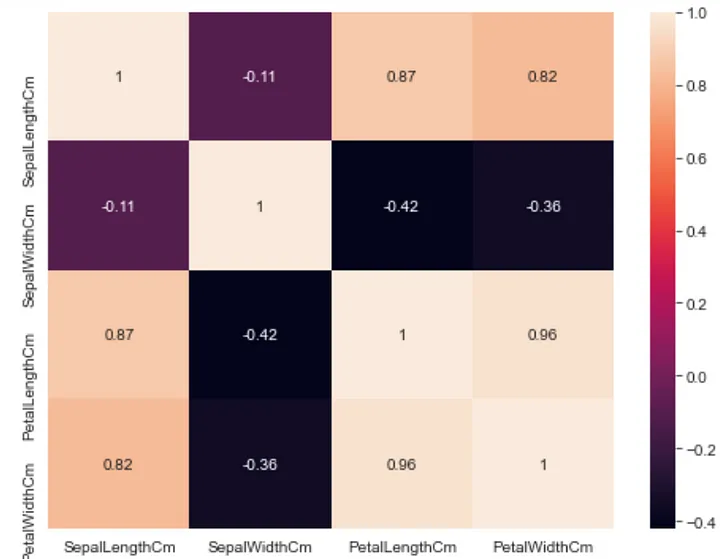

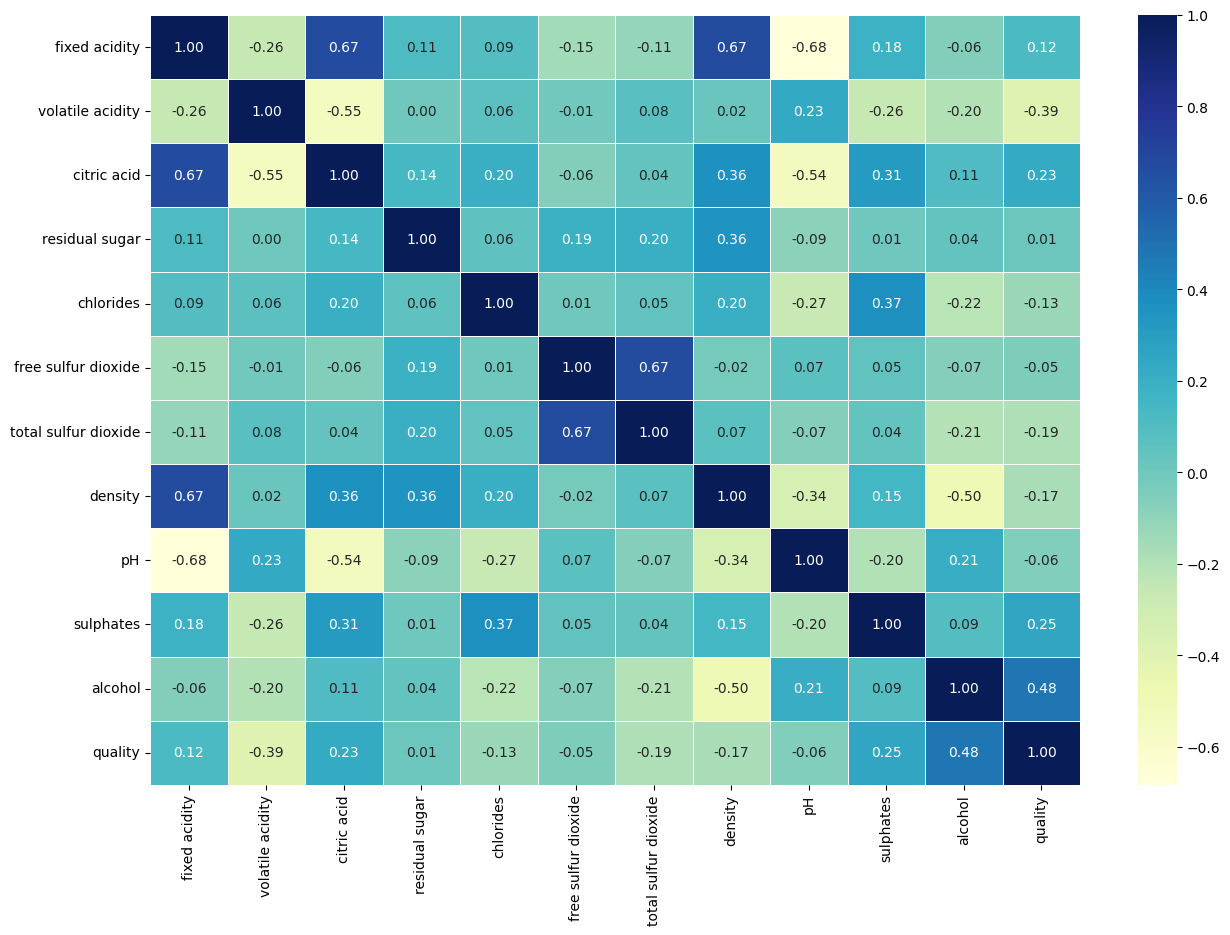

In [18]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Scatter Plot

Melihat pesebaran data dengan x_axis=Sulfate dan y_axis=Solids, karena meliaht korelasi dari data tersebut

<Axes: xlabel='fixed acidity', ylabel='pH'>

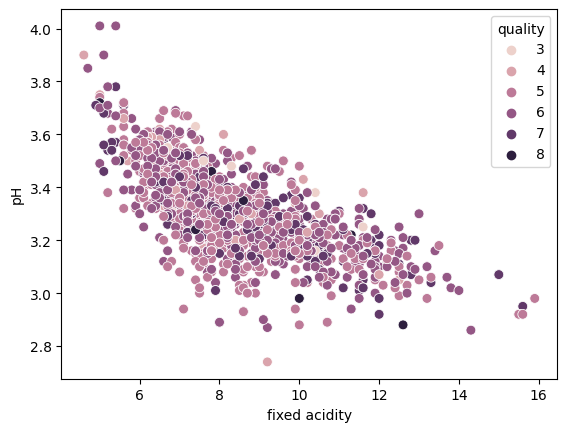

In [19]:
sns.scatterplot(x=df['fixed acidity'], y=df['pH'], hue=df[target_column], s=50)

## Pre-Processing Data

In [20]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Normalization

#### MinMax Normalization

In [22]:
minmax_df = df.copy()
minmax_df.drop('quality', axis=1, inplace=True)

scaler = MinMaxScaler()
scaler.fit(minmax_df)
data = scaler.transform(minmax_df)
data

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [26]:
minmax_df = pd.DataFrame(data, columns=minmax_df.columns)
minmax_df['quality'] = df['quality']
minmax_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707  \
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH   
0               -0.466193             -0.379133  0.558274  1.288643  \
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality  
0     -0.579207 -0.960246        5  
1      0.128950 -0.584777        5  
2     -0.048089 -0.584777        5  
3     -0.461180 -0.584777        6  
4     -0.579207 -0.960246        5  
...         ...       ...      ...  
1594  -0.461180  0.072294        5  
1595   0.601055  0.729364        6  
1596   0.542042  0.541630        6  
1597   0.305990 -0.209308        5  
1598   0.010924  0.541630        6  

[1599 rows x 12 columns]

#### Z-Score Normalization

In [24]:
z_score_df = df.copy()
z_score_df.drop('quality', axis=1, inplace=True)

scaler = StandardScaler()
scaler.fit(z_score_df)
data = scaler.transform(z_score_df)
data

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [27]:
z_score_df = pd.DataFrame(data, columns=z_score_df.columns)
z_score_df['quality'] = df['quality']
z_score_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707  \
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH   
0               -0.466193             -0.379133  0.558274  1.288643  \
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality  
0     -0.579207 -0.960246        5  
1      0.128950 -0.584777        5  
2     -0.048089 -0.584777        5  
3     -0.461180 -0.584777        6  
4     -0.579207 -0.960246        5  
...         ...       ...      ...  
1594  -0.461180  0.072294        5  
1595   0.601055  0.729364        6  
1596   0.542042  0.541630        6  
1597   0.305990 -0.209308        5  
1598   0.010924  0.541630        6  

[1599 rows x 12 columns]

## Modeling

### Classification

In [162]:
# X, y = z_score_df.iloc[:, :-1], z_score_df['quality']
X, y = minmax_df.iloc[:, :-1], minmax_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(f'Train size : {X_train.shape}, {y_train.shape}')
# print(f'Validation size : {X_val.shape}, {y_val.shape}')
print(f'Test size : {X_test.shape}, {y_test.shape}')

Train size : (1279, 11), (1279,)
Test size : (320, 11), (320,)


In [174]:
model = RandomForestClassifier(n_estimators=500,
                               max_depth=30,
                               random_state=42,)
model.fit(X_train, y_train)
print("Train Accuracy :",model.score(X_train, y_train))
print("Test Accuracy :",model.score(X_test, y_test))

Train Accuracy : 1.0
Test Accuracy : 0.715625


### Evaluation

<Axes: >

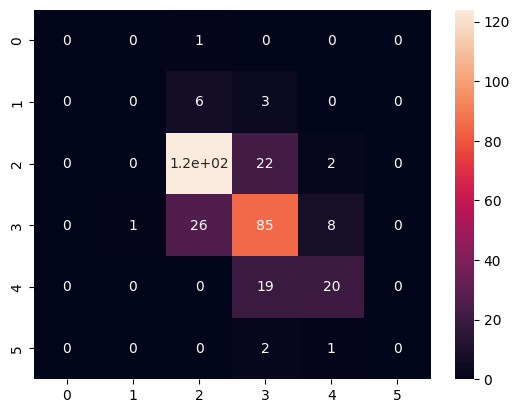

In [175]:
y_preds = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(cf_matrix, annot=True)

In [176]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.79      0.84      0.81       148
           6       0.65      0.71      0.68       120
           7       0.65      0.51      0.57        39
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.69      0.72      0.70       320



c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Cross Validation

In [169]:
seed = 42
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# models = {"SVM":SVC(),
#          "KNN": KNeighborsClassifier(),
#          "Random Forest": RandomForestClassifier(),
#          "Naive Bayes": GaussianNB()}

models = {"Random Forest": RandomForestClassifier()}

def fit_eval(models, X, y):
    np.random.seed(seed)
    model_scores = {}
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=kfold)
        model_scores[name] = scores.max()
    return model_scores

In [170]:
model_scores = fit_eval(models, X, y)
model_scores

{'Random Forest': 0.775}